# Display the 384 well plate

In [1]:
import json
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()

x_paths = ["/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Top right_xposition.json",
          "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Top left_xposition.json",
          "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Bottom left_xposition.json"]
y_paths = ["/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Top right_yposition.json",
          "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Top left_yposition.json",
          "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Bottom left_yposition.json"]

tr, tl, bl = [ [eval(json.load(open(x))["Value"]),eval(json.load(open(y))["Value"])] for x,y in zip(x_paths, y_paths) ]
r_n, c_n = 24, 16

from DragonFlyWellPlateAutomation.gui.Visualisation import setplotlimits, setticks
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import numpy as np


def create_plot():
    
    # All values are in mm

    fig, axis = plt.subplots()
    xmin=-50 
    xmax=60
    ymin=-38
    ymax= 34

    ## Reduce scatter point to field of view size
    fov = 250*10**(-6) * 1024



    axis.set_xlim(xmin, xmax)
    axis.set_ylim(ymin, ymax)

    c_n = 24
    r_n = 16

    x_coords=np.linspace(-50,60,c_n)
    x_values=list(range(1, c_n+1))
    ycoords=np.linspace(-38,34,r_n)
    y_values= [x for x in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[:r_n]]


    axis.set_xticks(x_coords)
    axis.set_xticklabels(x_values)
    axis.tick_params(axis='x', labelsize='x-small')

    # Set y-axis ticks from P to A
    axis.set_yticks(ycoords)
    axis.set_yticklabels(reversed(y_values))
    axis.tick_params(axis='y', labelsize='medium')


    axis.set_title('Real-Time {} well plate positioning'.format(c_n * r_n))

    axis.grid(which='both')
    axis.set_aspect("equal")

    ### Get normalized length and height of axis
    # Scaling factor of y and x 
    transform = ((404.43636364-79.78181818)/72)
    well_h= 4.5
    print(transform)
    #Pixels
    well_h_pixels = (well_h * transform) 
    #Points
    p = 72/100
    print(well_h_pixels)
    #s
    s = (well_h_pixels*p)**2
    y_offset = (2/16)
    x_offset = (2/24)
    fov = 250*10**(-6) * 1024 #height
    s = (fov*p)**2


    return axis



search for root_dir and set working directory
Working directory set to: /media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation


In [18]:
print(tl)

[-47.7, 33.1]


In [20]:
print(bl)

[-47.7, -38.6]


4.509090909166667
20.29090909125


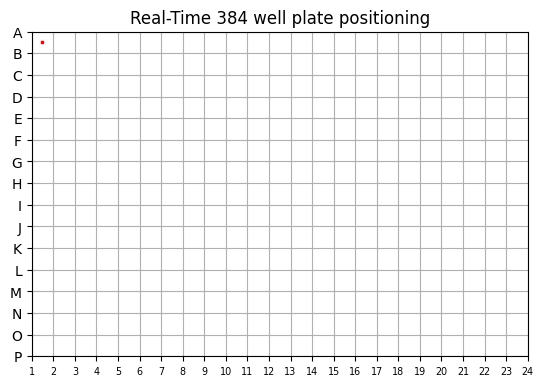

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# All values are in mm

fig, axis = plt.subplots()
xmin=-50 
xmax=60
ymin=-38
ymax= 34

## Reduce scatter point to field of view size
fov = 250*10**(-6) * 1024



axis.set_xlim(xmin, xmax)
axis.set_ylim(ymin, ymax)

c_n = 24
r_n = 16

x_coords=np.linspace(-50,60,c_n)
x_values=list(range(1, c_n+1))
ycoords=np.linspace(-38,34,r_n)
y_values= [x for x in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[:r_n]]


axis.set_xticks(x_coords)
axis.set_xticklabels(x_values)
axis.tick_params(axis='x', labelsize='x-small')

# Set y-axis ticks from P to A
axis.set_yticks(ycoords)
axis.set_yticklabels(reversed(y_values))
axis.tick_params(axis='y', labelsize='medium')
    
    
axis.set_title('Real-Time {} well plate positioning'.format(c_n * r_n))

axis.grid(which='both')
axis.set_aspect("equal")

### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height
s = (fov*p)**2


axis.scatter(xmin + (4.5/2) + x_offset, ymax-(4.5/2)-y_offset, c="r", s=s*100, marker=",")


plt.show()

In [ ]:
# Save this as marker occuping one cell
axis.scatter(xmin + (4.5/2) + x_offset, ymax-(4.5/2)-y_offset, c="r", s=s, marker=",")

In [23]:
- 60 - 50 # 110 x length

-40 - 32 # 72mm x height


-72

In [29]:
axis.transData.transform((-50, -38)) #x,y for bl

array([80.        , 79.78181818])

In [30]:
axis.transData.transform((-50, 34)) #x,y for tl

array([ 80.        , 404.43636364])

4.509090909166667

## Predict coordinates of wells using 384 well plate class

In [2]:
import json
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
from DragonFlyWellPlateAutomation.devices.wellplate import WellPlate as wp

x_paths = ["/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Top right_xposition.json",
          "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Top left_xposition.json",
          "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Bottom left_xposition.json"]
y_paths = ["/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Top right_yposition.json",
          "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Top left_yposition.json",
          "/media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation/endpoint_outputs/Bottom left_yposition.json"]

tr, tl, bl = [ [eval(json.load(open(x))["Value"]),eval(json.load(open(y))["Value"])] for x,y in zip(x_paths, y_paths) ]
r_n, c_n = 16, 24

WellPlate = wp()
WellPlate.well_plate_req_coords["Top right well"] = WellPlate.vector_2_state_dict(tr)
WellPlate.well_plate_req_coords["Top left well"] = WellPlate.vector_2_state_dict(tl)
WellPlate.well_plate_req_coords["Bottom left well"] = WellPlate.vector_2_state_dict(bl)

search for root_dir and set working directory
Working directory set to: /media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation
search for root_dir and set working directory
Working directory set to: /media/ibrahim/Extended Storage/cloud/Internship/bioquant/348_wellplate_automation


In [12]:
tl

[-47.7, 33.1]

### Try 1: Publication with 4 corners

In [6]:


vectors, well_names, length, height, x_spacing = WellPlate.predict_well_coords(c_n, r_n, algorithm=WellPlate.coordinate_frame_algorithms[1], algorithm_H="non-linear", well_plate_req_coords=WellPlate.well_plate_req_coords
                            )

1. Getting all four corner wells coordinates as vectors
2. Computing coordinate space from well corners using Linear correction matrix
Saving all variables associated to the coordinate system.


In [8]:
# Now visualise on coordinate plot method from publication

### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height
s = (fov*p)**2
    
axis = create_plot()


for vector in vectors:
    x,y,_ = vector
    axis.scatter(x,y, c="r", s=s*100, marker=",")
plt.show()

4.509090909166667
20.29090909125
4.509090909166667
20.29090909125


### Try 2: Linear spacing with 3 corners

In [3]:
vectors, well_names, length, height, x_spacing = WellPlate.predict_well_coords(c_n, r_n, algorithm="Linear spacing", algorithm_H="non-linear", well_plate_req_coords=WellPlate.well_plate_req_coords
                            )

### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height
s = (fov*p)**2
    
axis = create_plot()

vectors = np.array(vectors, dtype=np.float32)
if len(vectors[0]) < 3:
    vectors = np.hstack((np.array(vectors, dtype=np.float32), np.zeros((len(vectors),1))))
for vector in vectors:
    x,y,_ = vector
    axis.scatter(x,y, c="r", s=s*100, marker=",")

1. Getting all four corner wells coordinates as vectors
2. Computing coordinate space from well corners using Linear spacing
Saving all variables associated to the coordinate system.
4.509090909166667
20.29090909125
4.509090909166667
20.29090909125


### Try 3: Homography estimated using SVD and fixit

In [3]:
vectors, well_names, length, height, x_spacing = WellPlate.predict_well_coords(c_n, r_n, algorithm="Homography", algorithm_H="SVD", well_plate_req_coords=WellPlate.well_plate_req_coords
                            )

### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height_
s = (fov*p)**2
    
axis = create_plot()

vectors = np.array(vectors, dtype=np.float32)
if len(vectors[0]) < 3:
    vectors = np.hstack((np.array(vectors, dtype=np.float32), np.zeros((len(vectors),1))))
for vector in vectors:
    x,y,_ = vector
    axis.scatter(x,y, c="r", s=s*100, marker=",")
    
plt.show()

1. Getting all four corner wells coordinates as vectors
2. Computing coordinate space from well corners using Homography
Learning the homography matrix using SVD to map from well plate row and column arrangement to xzy-stage coordinate space
Saving all variables associated to the coordinate system.
4.509090909166667
20.29090909125
4.509090909166667
20.29090909125


### Try 4: RANSAC Homography

In [7]:
vectors, well_names, length, height, x_spacing = WellPlate.predict_well_coords(c_n, r_n, algorithm="Homography", algorithm_H="Levenberg-Marquardt", well_plate_req_coords=WellPlate.well_plate_req_coords
                            )

### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height
s = (fov*p)**2
    
axis = create_plot()

vectors = np.array(vectors, dtype=np.float32)
if len(vectors[0]) < 3:
    vectors = np.hstack((np.array(vectors, dtype=np.float32), np.zeros((len(vectors),1))))
for vector, wellname in zip(vectors,well_names):

    x,y,_ = vector
    axis.scatter(x,y, c="r", s=s*100, marker=",")
    
plt.show()

1. Getting all four corner wells coordinates as vectors
2. Computing coordinate space from well corners using Homography
Learning the homography matrix using Levenberg-Marquardt to map from well plate row and column arrangement to xzy-stage coordinate space
Saving all variables associated to the coordinate system.
4.509090909166667
20.29090909125
4.509090909166667
20.29090909125


### Try 5: Eigendecomposition Homography

In [5]:
vectors, well_names, length, height, x_spacing = WellPlate.predict_well_coords(c_n, r_n, algorithm="Homography", algorithm_H="Eigendecomposition", well_plate_req_coords=WellPlate.well_plate_req_coords
                            )

### Get normalized length and height of axis
# Scaling factor of y and x 
transform = ((404.43636364-79.78181818)/72)
well_h= 4.5
print(transform)
#Pixels
well_h_pixels = (well_h * transform) 
#Points
p = 72/100
print(well_h_pixels)
#s
s = (well_h_pixels*p)**2
y_offset = (2/16)
x_offset = (2/24)
fov = 250*10**(-6) * 1024 #height
s = (fov*p)**2
    
axis = create_plot()

vectors = np.array(vectors, dtype=np.float32)
if len(vectors[0]) < 3:
    vectors = np.hstack((np.array(vectors, dtype=np.float32), np.zeros((len(vectors),1))))
for vector in vectors:
    x,y,_ = vector
    axis.scatter(x,y, c="r", s=s*100, marker=",")
    
plt.show()

1. Getting all four corner wells coordinates as vectors
2. Computing coordinate space from well corners using Homography
Learning the homography matrix using Eigendecomposition to map from well plate row and column arrangement to xzy-stage coordinate space
Saving all variables associated to the coordinate system.
4.509090909166667
20.29090909125
4.509090909166667
20.29090909125


In [11]:
topleft, bottomleft, topright, bottomright = tl, bl, tr, np.array([tr[0], bl[1]]) 

wellcoords_key = sum([[str(r + 1) + "-" + str(c + 1) for c in range(c_n)] for r in range(r_n)], [])
topleft_wn, topright_wn, bottomleft_wn, bottomright_wn, middle_wn = [wellcoords_key[x] for x in
                                                                     [0, c_n - 1, (r_n * c_n) - c_n,
                                                                      (r_n * c_n) - 1,
                                                                      int((((r_n / 2) * c_n)) - ((c_n/2) + 1))]]
# TODO Temporary
middle = [r_n/2, c_n/2]
middle = [np.linspace(topleft[0], topright[0], c_n)[int(middle[-1]-1)],
          np.linspace(topleft[1], bottomleft[1], r_n)[int(middle[0]-1)]]

vectors = [topleft, bottomleft, topright, bottomright, middle]
wellcoords_key= [topleft_wn, bottomleft_wn, topright_wn, bottomright_wn, middle_wn]
        
wellcoords = [np.flip([int(x.split("-")[0]), int(x.split("-")[1])]) for x in wellcoords_key]
pts_src = np.array(wellcoords, dtype=np.float32)
if len(pts_src[0]) < 3:
    pts_src = np.hstack((np.array(pts_src, dtype=np.float32), np.ones((len(vectors),1))))

pts_dst = np.array(vectors, dtype=np.float32)
if len(vectors[0]) < 3:
    pts_dst = np.hstack((np.array(vectors, dtype=np.float32), np.ones((len(vectors),1))))


In [12]:
A = [] #3,9
for i in range(len(pts_src)):
    x, y, z = pts_src[i]
    u, v, z = pts_dst[i]
    A.append([-x, -y, -1, 0, 0, 0, x * u, y * u, u])
    A.append([0, 0, 0, -x, -y, -1, x * v, y * v, v])

A = np.array(A)

# 9,3 @ 3,9
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)
# Find the smallest eigenvalue and its index
smallest_eigenvalue_index = np.argmin(eigenvalues)

# Extract the eigenvector corresponding to the smallest eigenvalue
homography_candidate = eigenvectors[:, smallest_eigenvalue_index]

# Reshape and normalize the homography matrix
homography = homography_candidate.reshape((3, 3))
homography = homography / homography[2, 2]


In [13]:
homography

array([[ 4.63978392e+00,  2.58803639e-05, -5.23108544e+01],
       [ 1.60273969e-02, -4.78775050e+00,  3.78810704e+01],
       [-2.93029796e-04,  5.43446345e-05,  1.00000000e+00]])

In [14]:
eigenvalues

array([6.62036021e+06, 1.24085907e+06, 4.38886756e+03, 1.26348047e+03,
       6.31135768e+02, 2.92835257e+02, 1.14835494e+02, 1.42933495e-05,
       1.08304859e+00])